## Tarea de la Semana 2 

- [x] (a) (i) Visualiza los datos que descargaste colocando un marcador en un gráfico 2D para cada par de valores de características, es decir, para cada fila de los datos. En el gráfico, el eje x debe ser el valor de la primera característica, el eje y el valor de la segunda característica y el marcador debe ser, por ejemplo, un marcador + cuando el valor objetivo sea +1 y un o cuando el objetivo sea −1. Tu gráfico debería tener un estilo similar a este (¡con puntos de datos diferentes, por supuesto!):
![Ejemplo de gráfico con dos características y diferentes marcadores](−1.0 −0.5 0.0 0.5 1.0)

- [x] Asegúrate de incluir una leyenda explicando qué marcadores/colores se utilizan para los puntos +1 y -1.

- [ ] (ii) Usa sklearn para entrenar un clasificador de regresión logística en los datos. Proporciona el modelo de regresión logística para predicciones e informa los valores de los parámetros del modelo entrenado. Discute, por ejemplo, qué característica tiene más influencia en la predicción, cuáles causan que la predicción aumente o disminuya.

- [ ] (iii) Ahora usa el clasificador de regresión logística entrenado para predecir los valores objetivo en los datos de entrenamiento. Agrega estas predicciones al gráfico 2D que generaste en la parte 

- [ ] (i), utilizando un marcador y color diferentes para que los datos de entrenamiento y las predicciones se puedan distinguir. Muestra la frontera de decisión del clasificador de regresión logística como una línea en el gráfico (deberás usar los valores de los parámetros del modelo entrenado para determinar qué línea debe ser, y explica cómo la obtuviste).

- [ ] (iv) Comenta brevemente sobre cómo las predicciones y los datos de entrenamiento se comparan.

- [ ] (b) Utiliza sklearn para entrenar clasificadores SVM lineales en tus datos (nb: asegúrate de usar la función LinearSVC en sklearn, no la función SVC).
(continúa)
 
 
- [ ] (b) Utiliza sklearn para entrenar clasificadores SVM lineales en tus datos (nota: asegúrate de usar la función LinearSVC en sklearn, no la función SVC).
- [ ] (i) Entrena clasificadores SVM lineales para un amplio rango de valores del parámetro de penalización C, por ejemplo, C = 0.001, C = 1, C = 100. Proporciona el modelo SVM para predicciones e informa los valores de los parámetros de cada modelo entrenado.

- [ ] (ii) Utiliza cada uno de estos clasificadores entrenados para predecir los valores objetivo en los datos de entrenamiento. Traza estas predicciones y los valores objetivo reales de los datos, junto con la frontera de decisión del clasificador.

- [ ] (iii) ¿Cuál es el impacto en los parámetros del modelo al cambiar C, y por qué? ¿Cuál es el impacto en las predicciones del SVM?
- [ ] (iv) ¿Cómo se comparan los parámetros del modelo SVM y las predicciones con las del modelo de regresión logística de la parte (a)?

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.model_selection import learning_curve

data = pd.read_csv("./data/dataset1.csv")
data.reset_index(inplace=True)
data.columns = ['X1', 'X2', 'y']
data.head()
df = data.copy()
df.head()

X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

print(X)

[[ 0.04  0.4 ]
 [-0.12 -0.62]
 [ 0.14 -0.42]
 ...
 [ 0.13 -0.45]
 [-0.11 -0.79]
 [ 0.69 -0.83]]


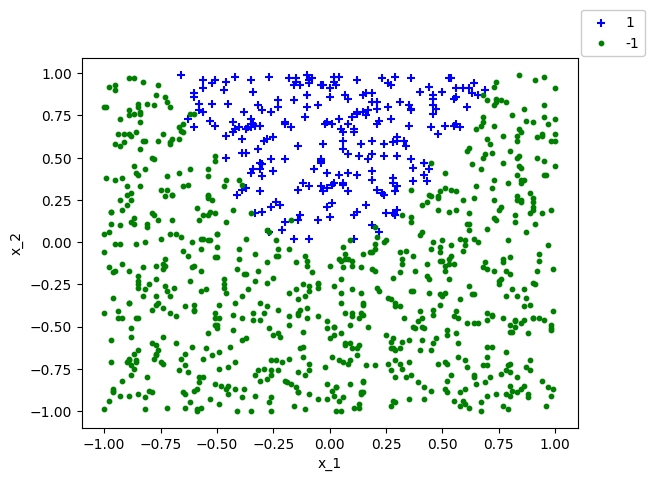

In [84]:
plt.style.use('default')
plt.scatter(X1[y==1], X2[y==1], c='b', marker = '+', label='1')
plt.scatter(X1[y==-1], X2[y==-1], c='g', marker = 'o', label='-1', s=10)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.15,1.15), loc='best', fancybox=True, framealpha=1, fontsize=10)
# plt.savefig('Figure_1.png')


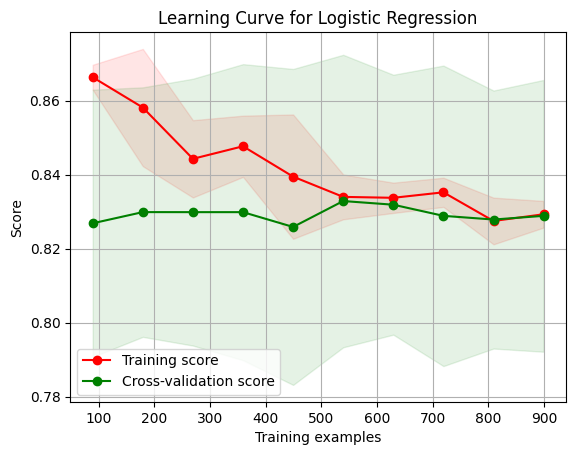

In [75]:

lr_model=LogisticRegression()

# Curvas de aprendizaje para logistic regression
train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
# Media y desviación estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
# Sombra de desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print('Train Set: ', x_train.shape, y_train.shape)
print('Test Set: ', x_test.shape, y_test.shape)

Train Set:  (799, 2) (799,)
Test Set:  (200, 2) (200,)


In [77]:
lr_model.fit(x_train, y_train)
print('The coefficients are: ',lr_model.coef_[0])
print('The intercept is: ',lr_model.intercept_)

The coefficients are:  [-0.08423714  3.59935851]
The intercept is:  [-2.10980671]


In [78]:
predictions = lr_model.predict(x_test)
score = lr_model.score(x_test, y_test)
print('The score is: ', score)

print(classification_report(y_test, predictions))

The score is:  0.83
              precision    recall  f1-score   support

          -1       0.88      0.89      0.89       147
           1       0.69      0.66      0.67        53

    accuracy                           0.83       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.83      0.83      0.83       200



Feature: 0, Score: -0.08424
Feature: 1, Score: 3.59936


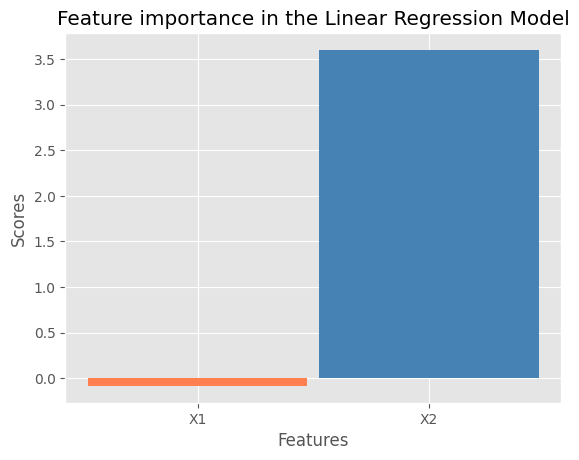

In [79]:
feature_importance = lr_model.coef_[0]
for i,val in enumerate(feature_importance):
    print('Feature: %0d, Score: %.5f' % (i,val))

with plt.style.context('ggplot'):
    plt.bar(['X1', 'X2'], feature_importance, width=0.95, color=['coral', 'steelblue'])
    plt.title('Feature importance in the Linear Regression Model')
    plt.xlabel('Features')
    plt.ylabel('Scores')
    plt.show()

[[131  16]
 [ 18  35]]


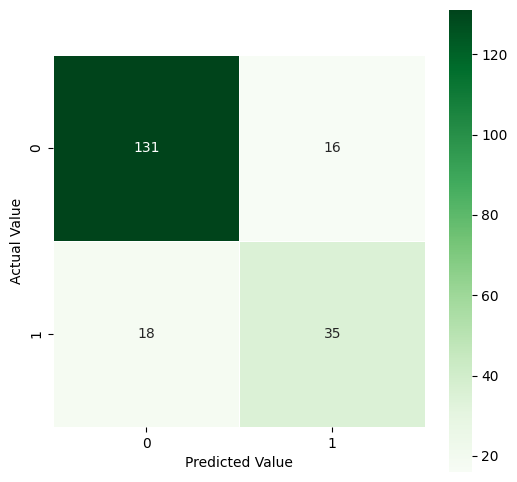

In [82]:
cm = confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual Value');
plt.xlabel('Predicted Value');
all_sample_title = 'Accuracy: {0}'.format(score)